<b>1</b> OBTENCIÓN DE DATOS

In [1]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

1172
key  ndvi len  1172
key  volImage len  1172
key  areaImage len  1172
key  hImage len  1172
key  dataIafNdvi len  1172
key  maxRed len  1172
key  minRed len  1172
key  maxBlue len  1172
key  meanRed len  1172
key  minBlue len  1172
key  maxGreen len  1172
key  meanBlue len  1172
key  minGreen len  1172
key  meanGreen len  1172
key  varianceRed len  1172
key  maxHistGrVal len  1172
key  maxHistValue len  1172
key  varianceBlue len  1172
key  maxHistBluVal len  1172
key  varianceGreen len  1172
key  criMean len  1172
key  criMax len  1172
key  criMin len  1172
key  cgreenviMean len  1172
key  cgreenviMax len  1172
key  cgreenviMin len  1172
key  cnirviMean len  1172
key  cnirviMax len  1172
key  cnirviMin len  1172
key  gndviMean len  1172
key  gndviMax len  1172
key  gndviMin len  1172
key  mcariOneMean len  1172
key  mcariOneMax len  1172
key  mcariOneMin len  1172
key  mtviOneMean len  1172
key  mtviOneMax len  1172
key  mtviOneMin len  1172
key  ngrdiMean len  1172
key  ngrdiMax 

<b>2</b> pre PROCESAMIENTO DE DATA

In [2]:
dataframe,datos,dictGeneral = definirCorrelacionVariables.generarMatrizDatos(data, True)

373


3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

373


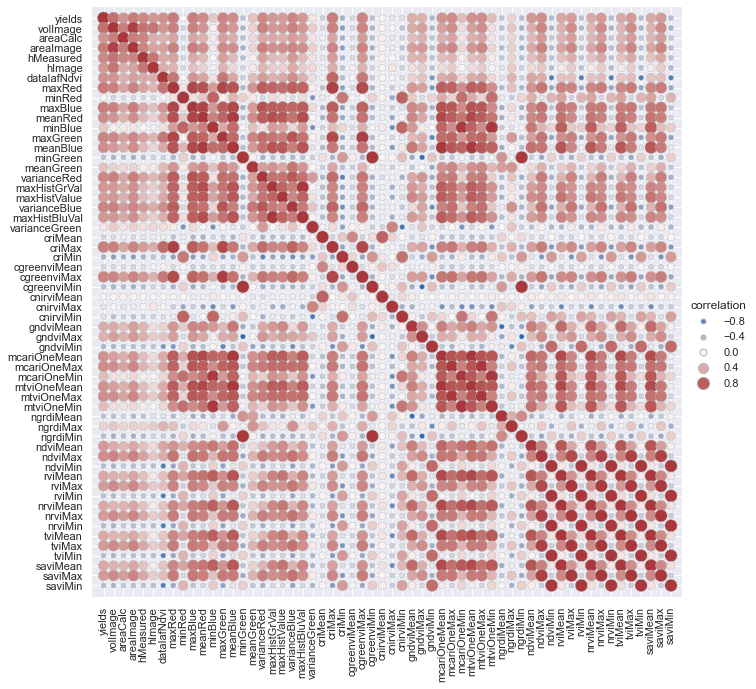

In [3]:
print(len(datos.datosYeld))
correlation=[]
correlation=dataframe.corr(method="pearson")

sns.set(font_scale=1)
corr_mat = dataframe.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(25, 150), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

GRAFICAS ENTRE VARIABLES

<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


<AxesSubplot:>

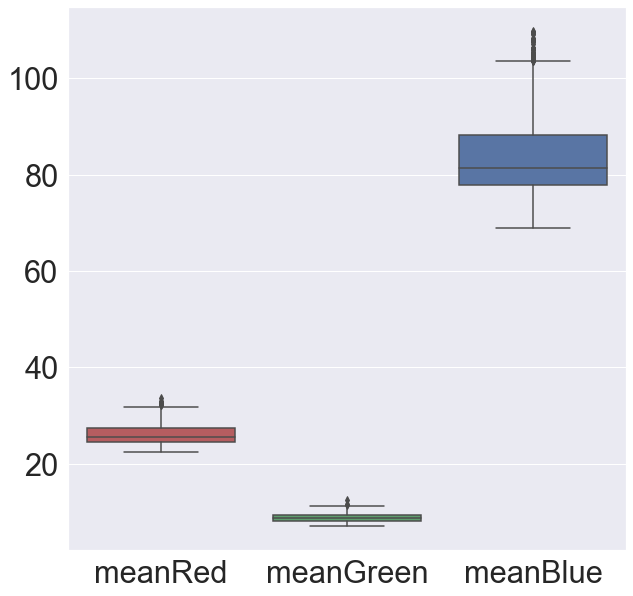

In [21]:

from sklearn.preprocessing import StandardScaler

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)
IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumenImagen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {"laiArea":IAF_from_area}
dictGeneral.update(d)
dframeFinal = pd.DataFrame(data=dictGeneral)
correlation=dframeFinal.corr(method="pearson")
scaled_features = StandardScaler().fit_transform(dframeFinal.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dframeFinal.index, columns=dframeFinal.columns)
pyplot.figure(figsize=(10,10))
my_pal = {"meanRed": "r", "meanGreen": "g", "meanBlue":"b"}
sns.set(font_scale=2.8)
sns.boxplot(data=dataframe[['meanRed', 'meanGreen','meanBlue']],orient="v", palette=my_pal)



3.648259646881603
1.451541527339079


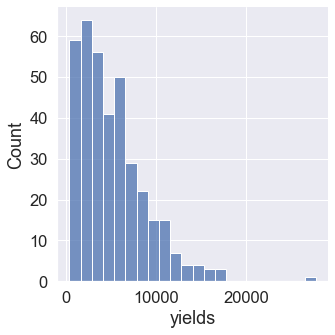

In [5]:
print(dframeFinal['yields'].kurt())
print(dframeFinal['yields'].skew())
sns.displot(dframeFinal['yields'])

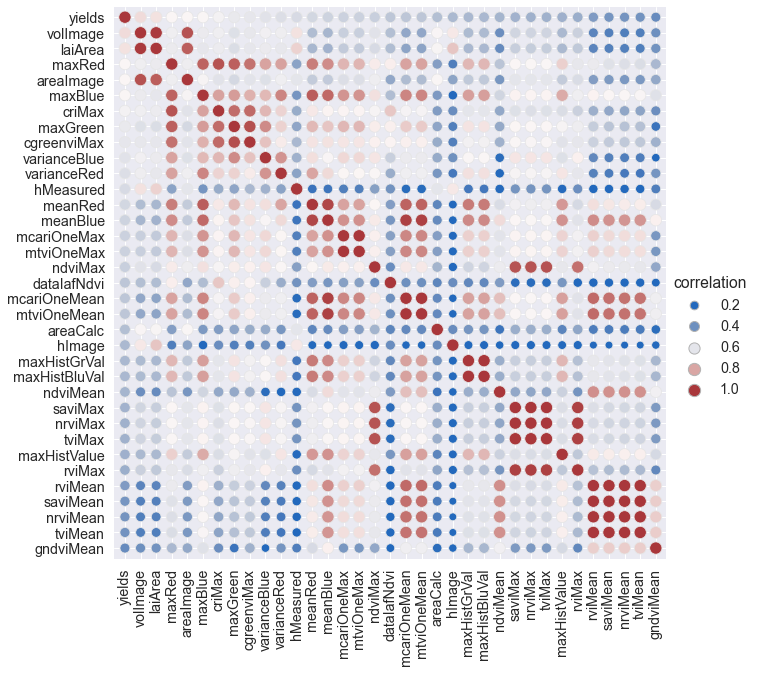

In [6]:
cols= correlation.nlargest(35,"yields")["yields"].index
cm= np.corrcoef(dframeFinal[cols].values.T)
sns.set(font_scale=1.3)
corr_mat = dframeFinal[cols].corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(0.3, 1), edgecolor=".9",
    height=10, sizes=(25, 150), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")



<h1> GRAFICAS DE VARIANZAS DE BANDAS</h1>

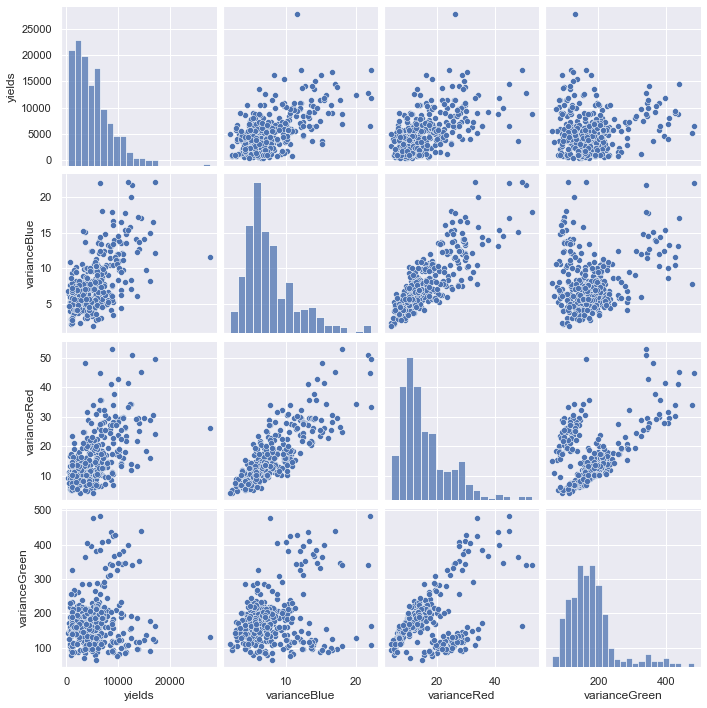

In [7]:

sns.set()
colsVariance = ["yields","varianceBlue","varianceRed","varianceGreen"]
sns.pairplot(dataframe[colsVariance],height=2.5,palette="muted",diag_kind="hist")
pyplot.show()

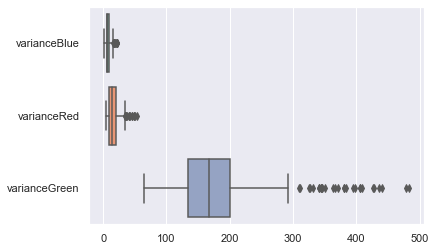

In [8]:
colsVariance = ["varianceBlue","varianceRed","varianceGreen"]
ax = sns.boxplot(data=dataframe[colsVariance], orient="h", palette="Set2")

<h1> GRAFICA DE NDVI </h1>

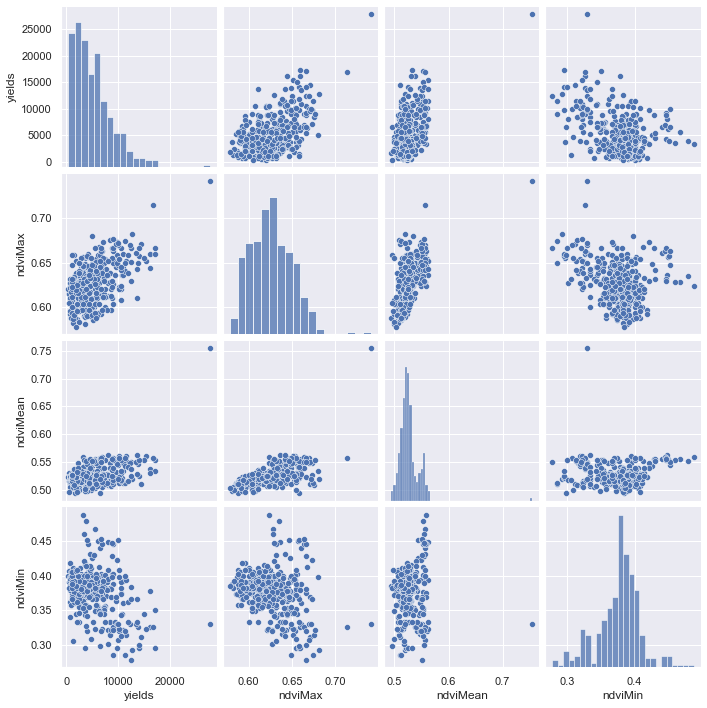

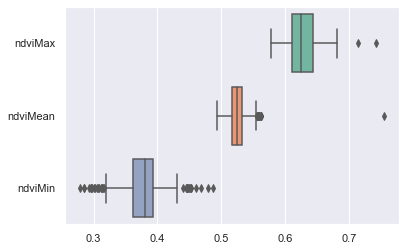

In [9]:
sns.set()
colsNdvi = ["yields","ndviMax","ndviMean","ndviMin"]
sns.pairplot(dataframe[colsNdvi],height=2.5)
pyplot.show()

colsVariance = ["ndviMax","ndviMean","ndviMin"]
ax = sns.boxplot(data=dataframe[colsVariance], orient="h", palette="Set2")

<h1>GRAFICA DE BANDAS</h1>

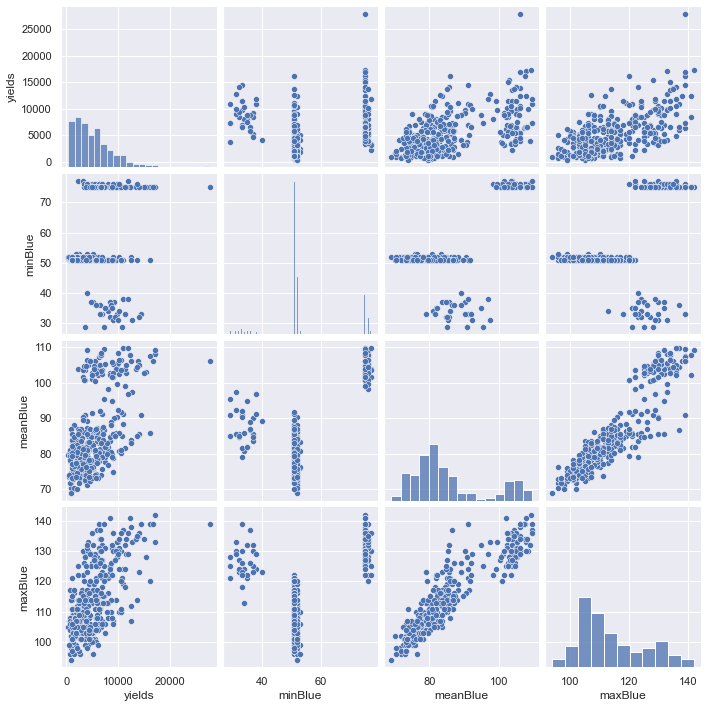

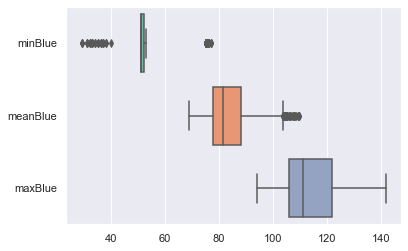

In [10]:
sns.set()
colsBlue = ["yields","minBlue","meanBlue","maxBlue"]
sns.pairplot(dataframe[colsBlue],height=2.5)
pyplot.show()

colsBlue = ["minBlue","meanBlue","maxBlue"]
ax = sns.boxplot(data=dataframe[colsBlue], orient="h", palette="Set2")

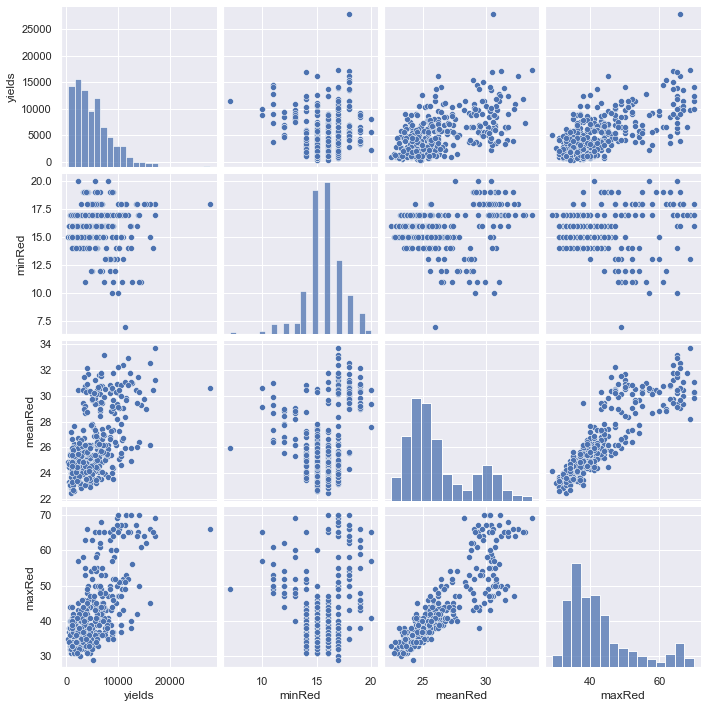

In [11]:
sns.set()
colsRed = ["yields","minRed","meanRed","maxRed"]
sns.pairplot(dataframe[colsRed],height=2.5)
pyplot.show()

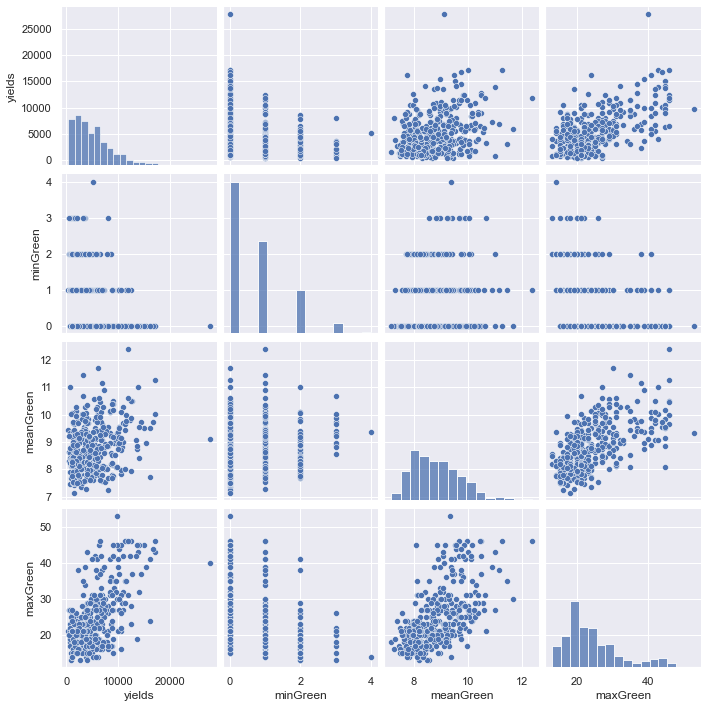

In [12]:
sns.set()
colsGreen = ["yields","minGreen","meanGreen","maxGreen"]
sns.pairplot(dataframe[colsGreen],height=2.5)
pyplot.show()

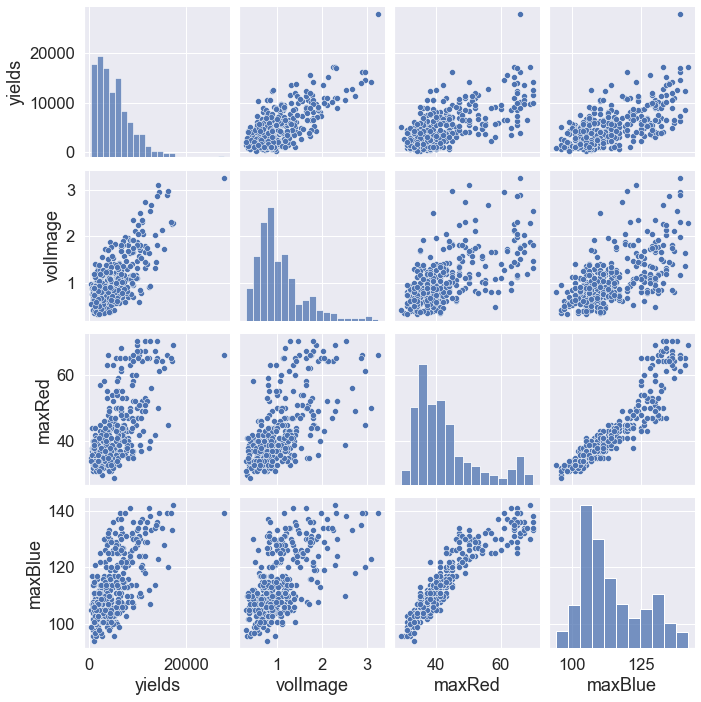

In [17]:
sns.set(font_scale=1.5)
colsGreen = ["yields",'volImage', 'maxRed', 'maxBlue']
sns.pairplot(dataframe[colsGreen],height=2.5)
pyplot.show()

<h1>NORMALIZE</h1>

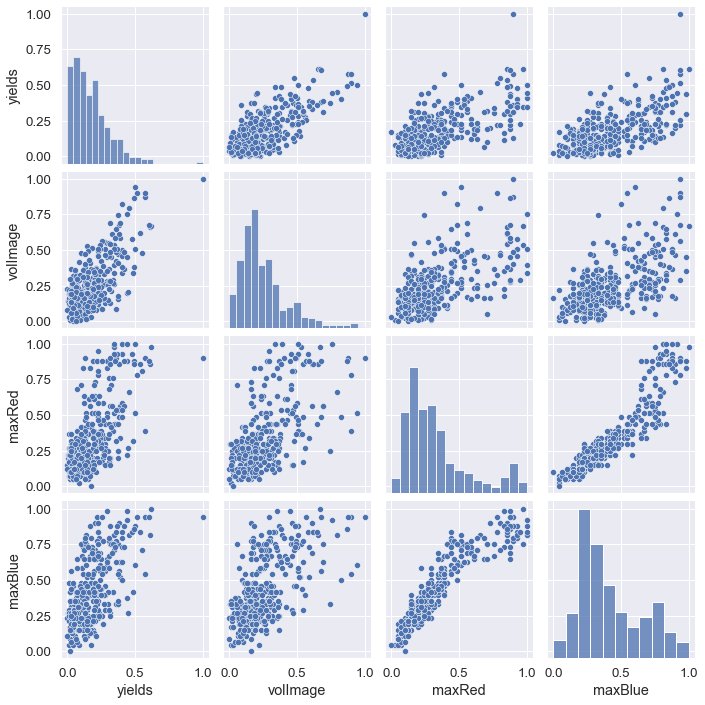

In [14]:
from sklearn.preprocessing import MinMaxScaler
colsRelations = ['yields','volImage', 'maxRed', 'maxBlue']
x = dataframe[colsRelations]
min_max_scaler = MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = colsRelations
sns.pairplot(df,height=2.5)


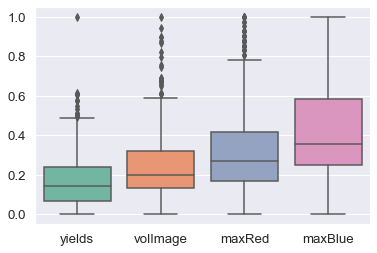

In [15]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")